# Методы обучения без учителя.
## Методы кластеризации

В этом задании вам необходимо будет применить 3 метода кластеризации к данным.

Для каждого метода будет свой вопрос, ответ на который надо будет передать на портал

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Подготовка данных

Для начала загрузим данные из этой [статьи](https://fivethirtyeight.com/features/weather-forecast-news-app-habits/)

In [2]:
df = pd.read_csv('./weather-check.csv')

In [3]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


Они представляют из сбея результат небольшого опроса жителей США на тему того, как они проверяют прогноз прогоды. Кроме того в опроснике есть пункты, связанные с соц-дем информацией: возраст, пол, заработок, регион. 

Все признаки, в данном случае, являются категориальными.

Для начала удалим столбец с идентификатором респондентов и столбец с открытым вопросом.

In [4]:
df = df.drop(labels=df.columns[0], axis=1)
df = df.drop(labels=df.columns[2], axis=1)

In [5]:
df.head()

,Do you typically check a daily weather report?,How do you typically check the weather?,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,Yes,The default weather app on your phone,Very likely,18 - 29,Male,Prefer not to answer,-
2,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,Yes,The default weather app on your phone,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,Yes,A specific website or app (please provide the ...,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


Далее выполним перекодировку признаков с помощью метода `pd.get_dummies`. 

Конечно, для таких признаков как "заработок" или "регион проживания" можно выполнить более интеллектуальное преобразование (например учитывающее, что ответ "50,000 to  74,999" ближе к "80,000 to 99,999", чем к "150,000 to 174,999"), но для первого подхода мы этого делать не будем.

# pd.get_dummies 
Превращает категиориальные признаки в список столбцов.
Если если у наблюдения есть какой то конкретный признак, то в столбце
который соотвествует этому признаку будет 1, а в других столбцах 0

In [6]:
df_dummy = pd.get_dummies(df)

In [7]:
X = df_dummy.values

## Kmeans

Обычно, результаты kmeans на данных, полностью состоящим из категориальных признаков, получаются не такими хорошими.

* Обучите метод к-средних с `n_clusters` от 2 до 20 и `random_state=123`
* Создайте массив `scores`
* Для каждого запуска вычислите `silhouette_score` полученной кластеризации
* В переменную `answer1` сохраните значение наибольшего значения из `scores` c точностью до сотых

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
# Параметры графиков
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

In [15]:
kmeans= KMeans(n_clusters=2,init='k-means++',n_init=10,random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [20]:
silhouette_score(X,kmeans.labels_)

0.1002864128782305

In [ ]:
# Получим метки кластеров и визуализируем их
labels = kmeans.labels_
plt.scatter(X[:,0],X[:,1],c=labels)

### *РЕШЕНИЕ*

In [22]:
scores = []
for k in range(2,21):
    # Создаем с заданными параметрами
    kmeans = KMeans(n_clusters=k,random_state=123)
    # Обучаем модель
    kmeans.fit(X)
    
    # Добавляем результат в список
    scores.append(silhouette_score(X,kmeans.labels_))

    
    

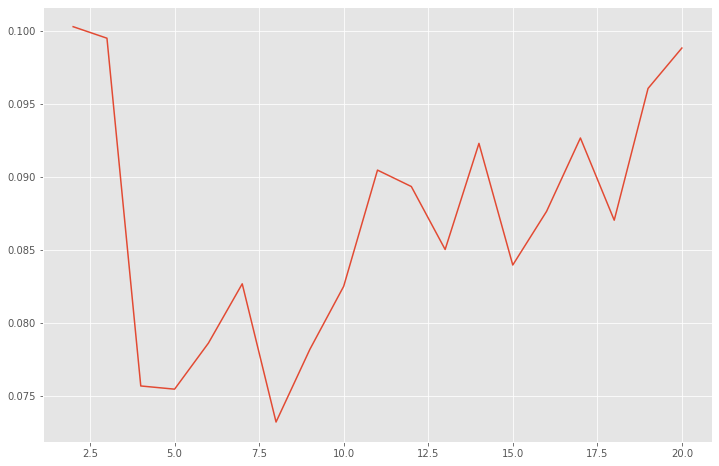

In [24]:
plt.plot(range(2,21),scores)

In [29]:
answer1 = max(scores)
answer1

0.1002864128782305

## Агломеративная кластеризация

Попробуем применить агломеративную кластеризацию

* Прогоните метод с параметрами `method='average'`, `metric='cosine'`
* Визуализируйте полученную дендрограмму
* Выделите 5 кластеров из полученной иерархии
* В переменную `answer2` запишите долю мужчин во втором по величине кластере с точностью до сотых

In [30]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

### *РЕШЕНИЕ*

In [31]:
# Проделаем иерархическую кластеризацию
Z = linkage(X,method='average',metric='cosine')

In [33]:
Z

array([[2.00000000e+00, 4.30000000e+01, 1.11022302e-16, 2.00000000e+00],
       [7.00000000e+00, 7.40000000e+01, 1.11022302e-16, 2.00000000e+00],
       [1.20000000e+01, 2.40000000e+01, 1.11022302e-16, 2.00000000e+00],
       ...,
       [1.84600000e+03, 1.84900000e+03, 7.14213948e-01, 7.64000000e+02],
       [1.85100000e+03, 1.85200000e+03, 7.87793272e-01, 9.16000000e+02],
       [1.62200000e+03, 1.85300000e+03, 9.12806717e-01, 9.28000000e+02]])

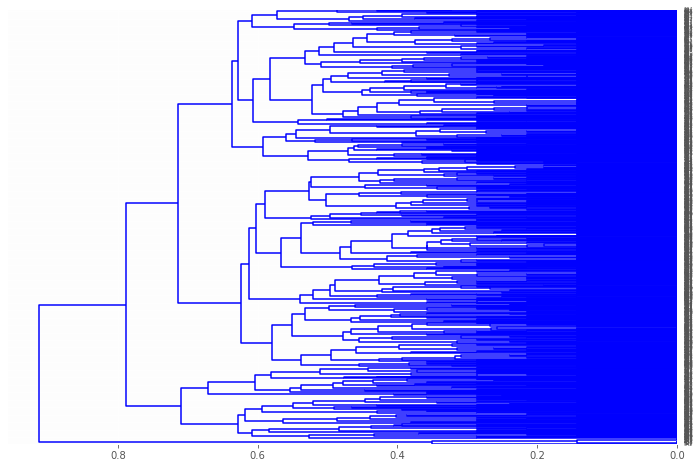

In [36]:
# Построили дендрограмму.В которой правда ничего не понятно
dend = dendrogram(Z,orientation='left',color_threshold=0.0)

In [38]:
# Разбиваем на кластеры
label = fcluster(Z,0.7,criterion='distance')
np.unique(label)

array([1, 2, 3, 4, 5], dtype=int32)

In [80]:
df['label'].value_counts()

4    433
5    331
2     92
3     60
1     12
Name: label, dtype: int64

In [93]:
# Вторая по числености группа это 5
# Отфильтруем 
c = df[df['label']==5]['What is your gender?'].value_counts()


In [95]:
c

Male      313
Female     18
Name: What is your gender?, dtype: int64

In [96]:
# Нулевой индекс в данной Series это мужчины, а 1 это женщины
male = c[0]
female = c[1]
answer2 = male /(male+female)

In [97]:
answer2

0.945619335347432

## DBSCAN

Возможно вы уже успели заметить, что часть респондентов практически не отвечали на заданные вопросы - то есть в соответствующих графах стоит символ "-". "Молчунами" будем называть участников опроса, которые не ответили ни на один вопрос. Таких респондентов можно сразу исключить из дальнейших исследований.

* Переберите значение параметра `eps` в интервале [0.1, 1] с шагом 0.1
* Остальные параметрамы установите следующим образом `min_samples=20`, `metric='cosine'`
* В переменную `answer3` запишите значение `eps` (c точностью до **сотых**) при котором алгоритм выделит всех "молчунов" в отдельный кластер с выбросами

In [49]:
from sklearn.cluster import DBSCAN

### *РЕШЕНИЕ*

In [60]:
for i in np.linspace(0.1,1,10):
    dbscsn = DBSCAN(eps,min_samples=20,metric='cosine')
    dbscsn.fit(X)
    labels= dbscsn.labels_
    pd.Series(labels).value_counts()

In [52]:
dbscsn = DBSCAN(0.1,min_samples=20,metric='cosine')
dbscsn.fit(X)
labels= dbscsn.labels_
pd.Series(labels).value_counts()

-1    928
dtype: int64

In [100]:
dbscsn = DBSCAN(0.5,min_samples=20,metric='cosine')
dbscsn.fit(X)
labels= dbscsn.labels_
pd.Series(labels).value_counts()

 0    916
-1     12
dtype: int64

In [101]:
answer3=0.5

# Строка с ответами

In [102]:
print('kmeans {:.2f}\nagg {:.2f}\ndbscan {:.2f}'.format(answer1, answer2, answer3))

kmeans 0.10
agg 0.95
dbscan 0.50
